# IDS Final Project Presentation                                                                    
                                                                                         

# NYC Noise Complaints
>- The dataset consists of complaints requests for different types of noises within New York City. It also provides us with the information about the agencies that are responsible for responding to these requests and the location where these complaints occur.


In [1]:
%matplotlib inline

import os
import numpy as np # importing numpy array
import pandas as pd # importing panda library
import seaborn as sns # importing seaborn, advanced of matplot
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
import scipy.stats as st
import statsmodels.api as sm

if int(os.environ.get("MODERN_PANDAS_EPUB", 0)):
    import prep # noqa

pd.options.display.max_rows = 30
sns.set(style='ticks', context='talk')

C:\Users\Akshat\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


# DATA IMPORTING

In [2]:
#read_csv is a function in pandas used to read data from an csv file into a list of DataFrames
tables = pd.read_csv("C:/Users/Akshat/Downloads/Noise_Data_new.csv")
tables.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,29607578,1/1/2015 1:39,1/1/2015 3:48,NYPD,New York City Police Department,Noise - Residential,Loud Music/Party,Residential Building/House,10452.0,930 OGDEN AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.831196,-73.930349,"(40.831195901208176, -73.93034856129522)"
1,29607583,1/1/2015 2:07,1/1/2015 7:30,NYPD,New York City Police Department,Noise - Residential,Loud Music/Party,Residential Building/House,10465.0,555 CALHOUN AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.822870,-73.821971,"(40.82287006360793, -73.82197105362941)"
2,29607586,1/1/2015 2:10,1/1/2015 4:54,NYPD,New York City Police Department,Noise - Residential,Loud Music/Party,Residential Building/House,10474.0,770 BRYANT AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.816130,-73.885942,"(40.81613045265912, -73.88594198876609)"
3,29607587,1/1/2015 0:19,1/1/2015 0:41,NYPD,New York City Police Department,Noise - Residential,Loud Talking,Residential Building/House,10468.0,2337 GRAND CONCOURSE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.858406,-73.899386,"(40.85840604170503, -73.89938613893433)"
4,29607589,1/1/2015 0:01,1/1/2015 0:20,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10031.0,508 WEST 139 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.821647,-73.950873,"(40.821646626438095, -73.95087342885292)"


In [3]:
# Structure of the data
tables.shape

(338746, 53)

As we can see, there 53 columns and total 342079 rows in our data.

# Data Cleaning Process

# Step 1: 
Drop all columns with only NaN values

In [4]:
tables=tables.dropna(axis=1, how='all') #  dropping columns which has only Nan values
tables.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,School Code,School Phone Number,School Address,School City,School State,School Zip,School Not Found,Latitude,Longitude,Location
0,29607578,1/1/2015 1:39,1/1/2015 3:48,NYPD,New York City Police Department,Noise - Residential,Loud Music/Party,Residential Building/House,10452.0,930 OGDEN AVENUE,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.831196,-73.930349,"(40.831195901208176, -73.93034856129522)"
1,29607583,1/1/2015 2:07,1/1/2015 7:30,NYPD,New York City Police Department,Noise - Residential,Loud Music/Party,Residential Building/House,10465.0,555 CALHOUN AVENUE,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.822870,-73.821971,"(40.82287006360793, -73.82197105362941)"
2,29607586,1/1/2015 2:10,1/1/2015 4:54,NYPD,New York City Police Department,Noise - Residential,Loud Music/Party,Residential Building/House,10474.0,770 BRYANT AVENUE,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.816130,-73.885942,"(40.81613045265912, -73.88594198876609)"
3,29607587,1/1/2015 0:19,1/1/2015 0:41,NYPD,New York City Police Department,Noise - Residential,Loud Talking,Residential Building/House,10468.0,2337 GRAND CONCOURSE,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.858406,-73.899386,"(40.85840604170503, -73.89938613893433)"
4,29607589,1/1/2015 0:01,1/1/2015 0:20,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10031.0,508 WEST 139 STREET,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.821647,-73.950873,"(40.821646626438095, -73.95087342885292)"


In [5]:
tables.shape

(338746, 42)

11 columns are dropped from our data. Let's proceed to Step 2

# Step 2:
Dropping those columns which are 'UnSpecified'

In [6]:
tables.drop(tables.columns[29:39],axis=1,inplace=True) # This will delete all the column from index 29 till 38
tables.drop(['Park Facility Name'],axis=1,inplace=True)
tables.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Resolution Description,Resolution Action Updated Date,Community Board,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Park Borough,Latitude,Longitude,Location
0,29607578,1/1/2015 1:39,1/1/2015 3:48,NYPD,New York City Police Department,Noise - Residential,Loud Music/Party,Residential Building/House,10452.0,930 OGDEN AVENUE,...,The Police Department responded to the complai...,1/1/2015 3:48,04 BRONX,BRONX,"1,003,525","242,112",BRONX,40.831196,-73.930349,"(40.831195901208176, -73.93034856129522)"
1,29607583,1/1/2015 2:07,1/1/2015 7:30,NYPD,New York City Police Department,Noise - Residential,Loud Music/Party,Residential Building/House,10465.0,555 CALHOUN AVENUE,...,The Police Department responded to the complai...,1/1/2015 7:30,10 BRONX,BRONX,"1,033,523","239,121",BRONX,40.822870,-73.821971,"(40.82287006360793, -73.82197105362941)"
2,29607586,1/1/2015 2:10,1/1/2015 4:54,NYPD,New York City Police Department,Noise - Residential,Loud Music/Party,Residential Building/House,10474.0,770 BRYANT AVENUE,...,The Police Department responded to the complai...,1/1/2015 4:54,02 BRONX,BRONX,"1,015,821","236,636",BRONX,40.816130,-73.885942,"(40.81613045265912, -73.88594198876609)"
3,29607587,1/1/2015 0:19,1/1/2015 0:41,NYPD,New York City Police Department,Noise - Residential,Loud Talking,Residential Building/House,10468.0,2337 GRAND CONCOURSE,...,The Police Department responded to the complai...,1/1/2015 0:40,05 BRONX,BRONX,"1,012,082","252,034",BRONX,40.858406,-73.899386,"(40.85840604170503, -73.89938613893433)"
4,29607589,1/1/2015 0:01,1/1/2015 0:20,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10031.0,508 WEST 139 STREET,...,The Police Department responded to the complai...,1/1/2015 0:20,09 MANHATTAN,MANHATTAN,"997,847","238,629",MANHATTAN,40.821647,-73.950873,"(40.821646626438095, -73.95087342885292)"


So far, we have removed all the data which is blank or null.
From 53 columns ,we have removed 22 columns so far from our dataset

# Step 3:

Modify the column names to make our lives simpler

In [7]:
tables.rename(columns={'Unique Key': 'Unique_Key'}, inplace=True)
tables.rename(columns={'Complaint Type': 'Complaint_Type'}, inplace=True)
tables.rename(columns={'Location Type': 'Location_Type'}, inplace=True)

# We will work on mostly these column for our Analysis

# Exploratory Data Analysis

In [8]:
# Step 1:

tables['Year_Date'] = pd.to_datetime(tables['Created Date'])
tables['Year']=(tables['Year_Date']).dt.year
tables['Hour'] = pd.to_datetime(tables['Created Date']).dt.hour
tables['Created Date'] = pd.to_datetime(tables['Created Date']).dt.date
tables['Closed Date'] = pd.to_datetime(tables['Closed Date']).dt.date
tables['Due Date'] = pd.to_datetime(tables['Due Date']).dt.date
tables['Resolution Action Updated Date']=pd.to_datetime(tables['Resolution Action Updated Date']).dt.date

In [9]:
# Creating Resolution Time variable
tables['Resolution_Time']=(tables['Closed Date']- tables['Created Date']).dt.days
tables['Resolution_Time'] = tables['Resolution_Time'].fillna(0) # replacing blank values with 0

In [10]:
tables.head()

,Unique_Key,Created Date,Closed Date,Agency,Agency Name,Complaint_Type,Descriptor,Location_Type,Incident Zip,Incident Address,...,X Coordinate (State Plane),Y Coordinate (State Plane),Park Borough,Latitude,Longitude,Location,Year_Date,Year,Hour,Resolution_Time
0,29607578,2015-01-01,2015-01-01,NYPD,New York City Police Department,Noise - Residential,Loud Music/Party,Residential Building/House,10452.0,930 OGDEN AVENUE,...,"1,003,525","242,112",BRONX,40.831196,-73.930349,"(40.831195901208176, -73.93034856129522)",2015-01-01 01:39:00,2015,1,0
1,29607580,2014-12-31,2015-01-01,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,11221.0,NaN,...,"999,406","190,873",BROOKLYN,40.690566,-73.945348,"(40.690566088541274, -73.94534834332518)",2014-12-31 23:34:00,2014,23,1
2,29607583,2015-01-01,2015-01-01,NYPD,New York City Police Department,Noise - Residential,Loud Music/Party,Residential Building/House,10465.0,555 CALHOUN AVENUE,...,"1,033,523","239,121",BRONX,40.822870,-73.821971,"(40.82287006360793, -73.82197105362941)",2015-01-01 02:07:00,2015,2,0
3,29607584,2014-12-31,2015-01-01,NYPD,New York City Police Department,Noise - Residential,Loud Music/Party,Residential Building/House,10027.0,566 WEST 126 STREET,...,"996,057","236,579",MANHATTAN,40.816023,-73.957344,"(40.816022527973146, -73.9573443848017)",2014-12-31 23:30:00,2014,23,1
4,29607585,2014-12-31,2015-01-01,NYPD,New York City Police Department,Noise - Residential,Loud Music/Party,Residential Building/House,10451.0,740 GRAND CONCOURSE,...,"1,005,107","239,099",BRONX,40.822922,-73.924641,"(40.822922484155754, -73.92464127288046)",2014-12-31 23:00:00,2014,23,1



# Problem Statement for our project
>- What are the factors that affects the resolution time for a complaint?




# Outlier Analysis

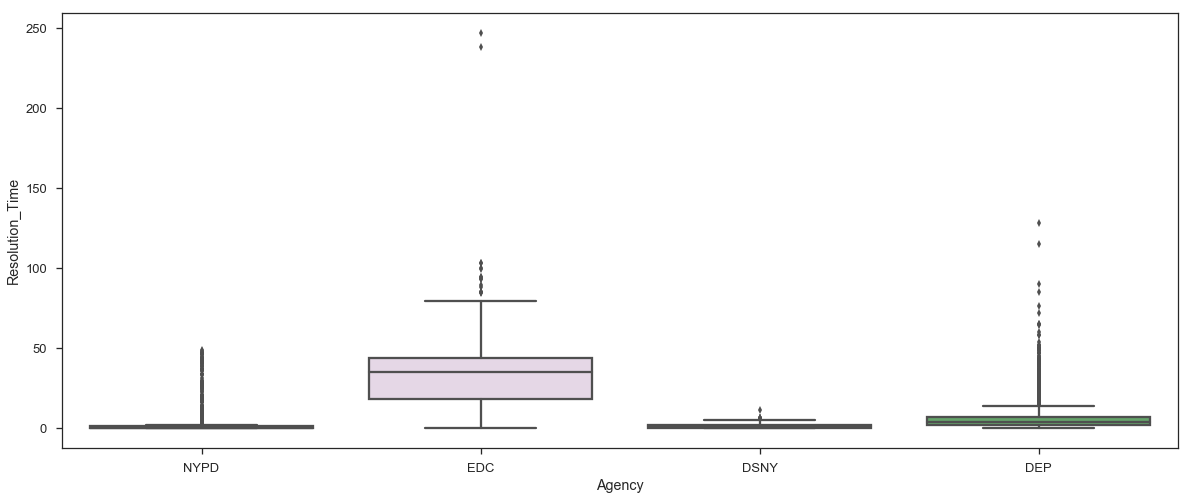

In [10]:
fig, ax = plt.subplots(figsize=(20, 8))
sns.boxplot(x="Agency", y="Resolution_Time", data=tables, palette="PRGn")
# Below Boxplot confirms that DEP takes maximum time to resolve issues amongst others

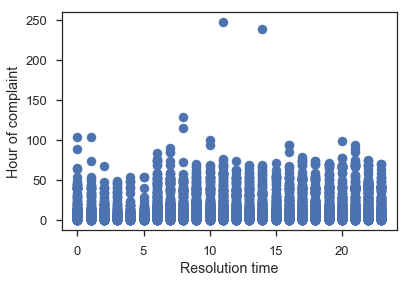

In [11]:
import scipy.stats as stats
import pylab
#measurements = np.random.normal(loc = 20, scale = 5, size=100)   
#stats.probplot(tables, dist="norm", plot=pylab)
#plt.title("PriceAverage Growing Season Temp of Bordeaux wine bottles")

#plt.grid(True)
plt.show()
plt.scatter(tables['Hour'],tables['Resolution_Time'])
plt.xlabel("Resolution time")
plt.ylabel("Hour of complaint")

In [10]:
tables = tables[tables.Resolution_Time != 247]
tables = tables[tables.Resolution_Time != 238]
tables = tables[tables.Resolution_Time != 248]

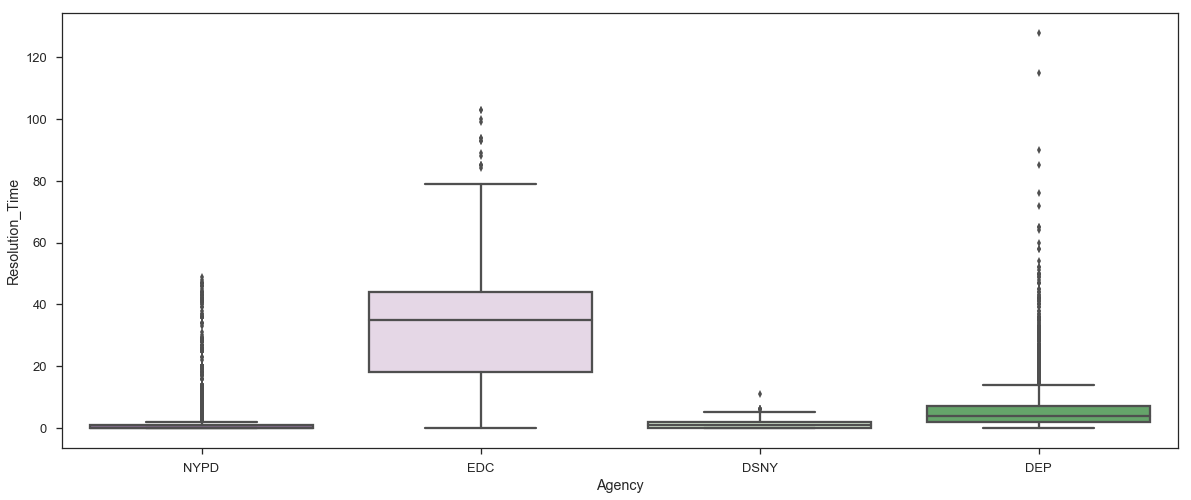

In [13]:
fig, ax = plt.subplots(figsize=(20, 8))
sns.boxplot(x="Agency", y="Resolution_Time", data=tables, palette="PRGn")
# Below Boxplot confirms that DEP takes maximum time to resolve issues amongst others

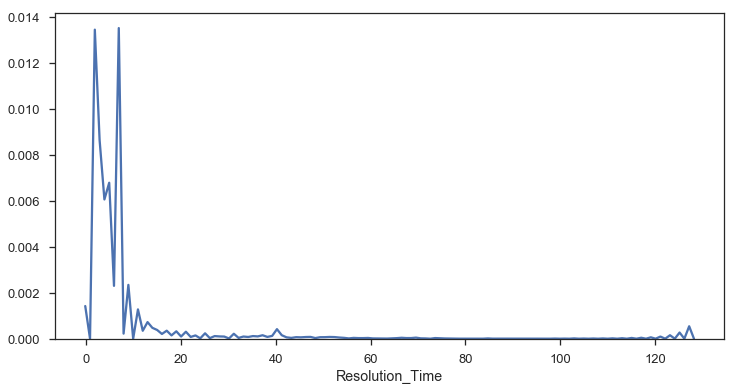

In [14]:
# Distinct plot of resolution timesns.kdeplot(Data['Resolution_Time'],shade=True)
fig, ax = plt.subplots(figsize=(12, 6))
sns.distplot(tables['Resolution_Time'],bins=20,hist=False)

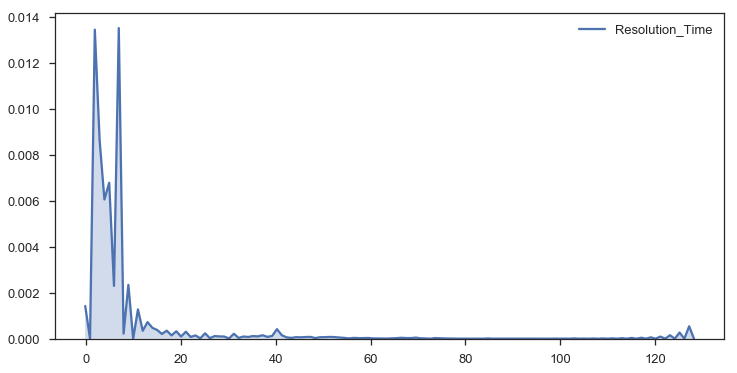

In [15]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.kdeplot(tables['Resolution_Time'],shade=True)

# Questions to the Data

>-  1. Which Agency receives the highest number of Complaints?

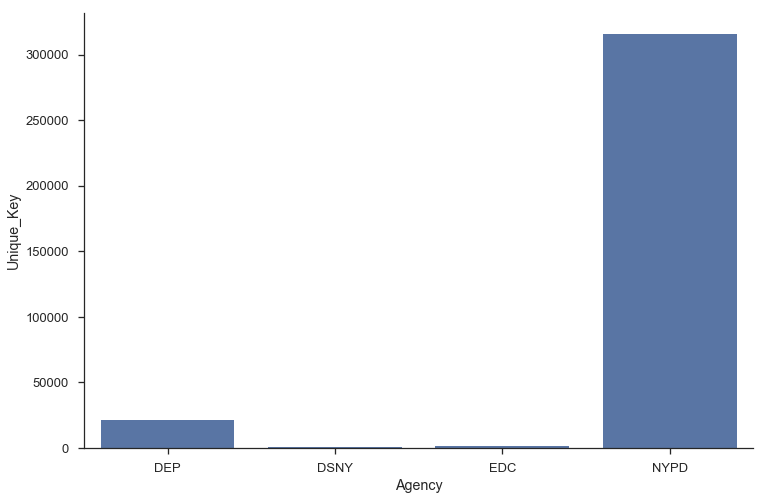

In [9]:
z=tables.groupby('Agency').Unique_Key.nunique().to_frame()
z.reset_index(level=0, inplace=True)
fig, ax = plt.subplots(figsize=(12, 8))
sns.barplot(x='Agency', y= 'Unique_Key', data=z,
            color='#4c72b0', ax=ax)
sns.despine()

In [213]:
# NYPD receives the highest number of complaints

>- 2.Which Agency takes the maximum time to resolve a complaint?


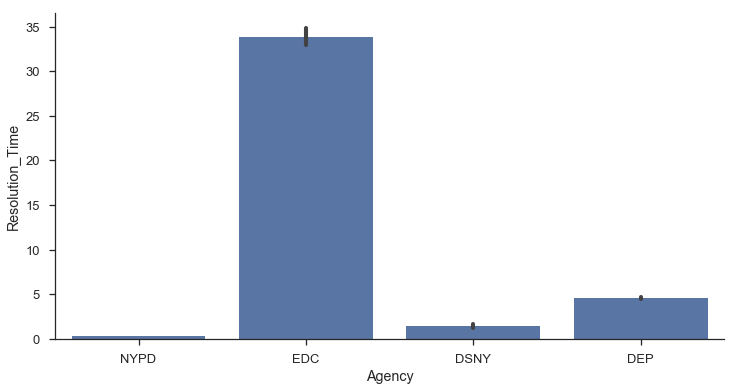

In [20]:
# Bar plot which plots resolution Time vs the Agencies
fig, ax = plt.subplots(figsize=(12, 6))
sns.barplot(x='Agency', y= 'Resolution_Time', data=tables,color='#4c72b0')
sns.despine()
# We observe that NYPD has lowest resolution time whereas EDC has highest resolution time

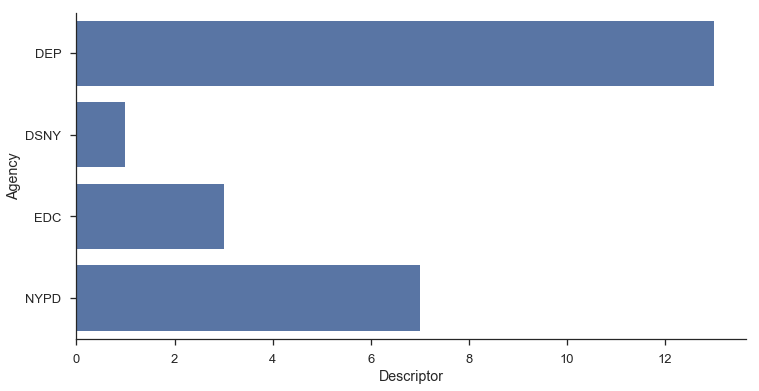

In [21]:
# This code groups by Landmark with resolution time
# To get which landmarks took maximum resolution time
c=tables.groupby('Agency').Descriptor.nunique().to_frame()
c.reset_index(level=0, inplace=True) # this code resets the index to a column for our analysis
fig, ax = plt.subplots(figsize=(12, 6))
sns.barplot(y='Agency', x= 'Descriptor', data=c,
            color='#4c72b0', ax=ax)
sns.despine()

In [54]:
# DEP receives maximum different types of Complaints whereas DSNY receives the lowest

>- 3.Which type of complaints are reported and what are their counts?

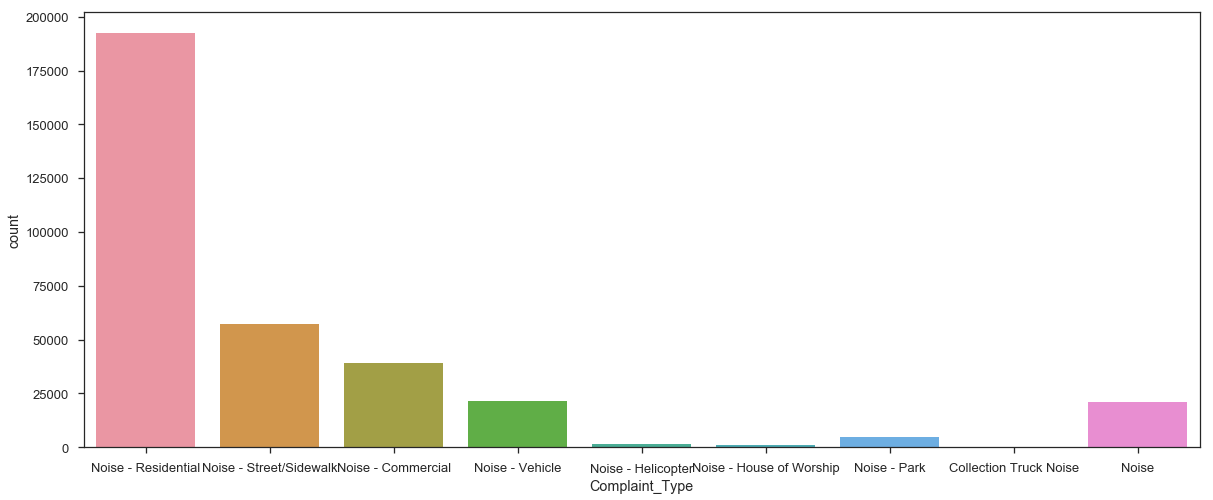

In [22]:
fig, ax = plt.subplots(figsize=(20, 8))
sns.countplot('Complaint_Type',data=tables)

>- We also analysed which day of the week, which time of the day, causes more noise complaints...

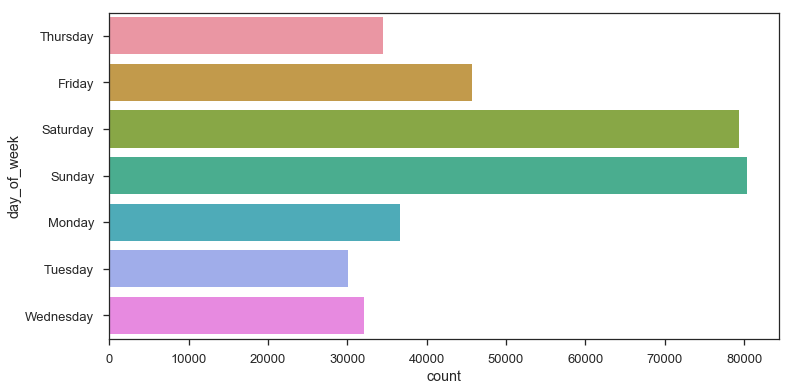

In [23]:
tables['Created Date'] = pd.to_datetime(tables['Created Date'])
tables['day_of_week'] = tables['Created Date'].dt.weekday_name
fig, ax = plt.subplots(figsize=(12, 6))
sns.countplot(y='day_of_week',data=tables)

In [24]:
tables.loc[(tables.Hour <= 3) | (tables['Hour']>=23), 'Time_of_Day' ] = 'Late Night'
tables.loc[(tables.Hour <= 6) & (tables['Hour']>3), 'Time_of_Day' ] = 'Early Morning'
tables.loc[(tables.Hour > 6) & (tables['Hour']<=12), 'Time_of_Day' ] = 'Morning'
tables.loc[(tables.Hour > 12) & (tables['Hour']<=16), 'Time_of_Day' ] = 'Afternoon'
tables.loc[(tables.Hour > 16) & (tables['Hour']<=19), 'Time_of_Day' ] = 'Evening'
tables.loc[(tables.Hour >19) & (tables['Hour']<=22), 'Time_of_Day' ] = 'Night'

In [60]:
max(tables['Hour'])

23

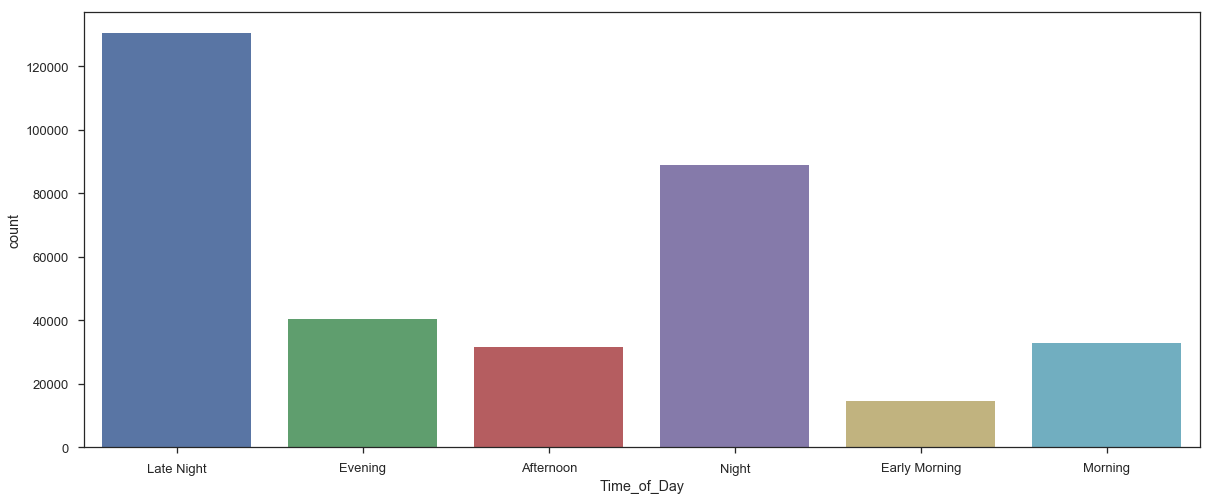

In [25]:
fig, ax = plt.subplots(figsize=(20, 8))
sns.countplot('Time_of_Day',data=tables)

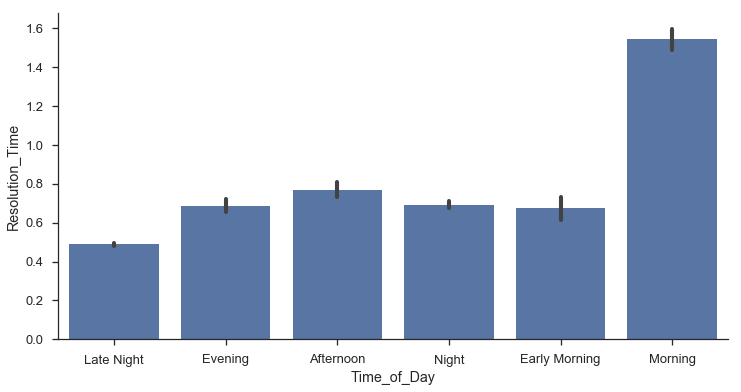

In [26]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.barplot(x='Time_of_Day', y= 'Resolution_Time', data=tables,color='#4c72b0')
sns.despine()

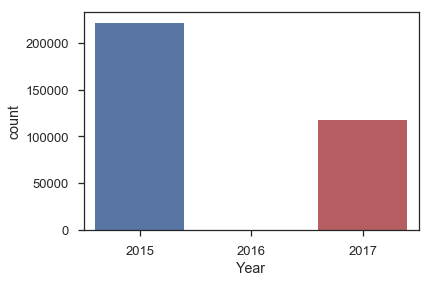

In [27]:
a=tables.groupby('Year').Unique_Key.nunique().to_frame()
a.reset_index(level=0, inplace=True)
sns.countplot('Year',data=tables)

In [17]:
Data=tables[['Agency','Complaint_Type','Descriptor','Location_Type','Resolution_Time','Hour','Year']]


# Factors Identified...
>- 
Unique_key,
created Date,
Closed Date,
Agency,
Complaint Type,
Descriptor,
Location Type,
Latitude,
Longitude


In [12]:
Data.head()

,Agency,Complaint_Type,Descriptor,Location_Type,Resolution_Time,Hour,Year
0,NYPD,Noise - Residential,Loud Music/Party,Residential Building/House,0,1,2015
1,NYPD,Noise - Residential,Loud Music/Party,Residential Building/House,0,2,2015
2,NYPD,Noise - Residential,Loud Music/Party,Residential Building/House,0,2,2015
3,NYPD,Noise - Residential,Loud Talking,Residential Building/House,0,0,2015
4,NYPD,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,0,0,2015


# Creating Linear Models

In [13]:
Data['Complaint_Type'].unique()

array(['Noise - Residential', 'Noise - Street/Sidewalk',
       'Noise - Commercial', 'Noise - Vehicle', 'Noise - Helicopter',
       'Noise - House of Worship', 'Noise - Park',
       'Collection Truck Noise', 'Noise'], dtype=object)

In [14]:
Data['Descriptor'].unique()

array(['Loud Music/Party', 'Loud Talking', 'Banging/Pounding',
       'Car/Truck Horn', 'Loud Television', 'Car/Truck Music', 'Other',
       'Engine Idling', '21 Collection Truck Noise',
       'Noise, Barking Dog (NR5)',
       'Noise: Construction Before/After Hours (NM1)',
       'Noise: air condition/ventilation equipment (NV1)',
       'Noise: Alarms (NR3)', 'News Gathering',
       'Noise: Construction Equipment (NC1)', 'NYPD',
       'Noise: Private Carting Noise (NQ1)',
       'Noise:  lawn care equipment (NCL)', 'Noise: Jack Hammering (NC2)',
       'Noise, Ice Cream Truck (NR4)', 'Noise: Manufacturing Noise (NK1)',
       'Noise: Boat(Engine,Music,Etc) (NR10)',
       'Noise, Other Animals (NR6)',
       'Noise: Other Noise Sources (Use Comments) (NZZ)'], dtype=object)

In [15]:
Data['Location_Type'].unique()

array(['Residential Building/House', 'Street/Sidewalk',
       'Club/Bar/Restaurant', 'Store/Commercial', 'Above Address',
       'House of Worship', 'Park/Playground', 'Sidewalk', nan], dtype=object)

In [19]:
dummy=pd.get_dummies(Data['Agency'])
new_data=pd.merge(Data,dummy,left_index=True,right_index=True)
#Data=pd.get_dummies(Data['Location_Type'])

In [20]:
dummy2=pd.get_dummies(Data['Location_Type'])
new_data=pd.merge(new_data,dummy2,left_index=True,right_index=True)

In [22]:
dummy3=pd.get_dummies(Data['Complaint_Type'])
new_data=pd.merge(new_data,dummy3,left_index=True,right_index=True)

In [21]:
new_data.head(2)

,Agency,Complaint_Type,Descriptor,Location_Type,Resolution_Time,Hour,Year,DEP,DSNY,EDC,NYPD,Above Address,Club/Bar/Restaurant,House of Worship,Park/Playground,Residential Building/House,Sidewalk,Store/Commercial,Street/Sidewalk
0,NYPD,Noise - Residential,Loud Music/Party,Residential Building/House,0,1,2015,0,0,0,1,0,0,0,0,1,0,0,0
1,NYPD,Noise - Residential,Loud Music/Party,Residential Building/House,0,2,2015,0,0,0,1,0,0,0,0,1,0,0,0


In [23]:
new_data=new_data.drop(['Agency','Location_Type','Complaint_Type','Descriptor'],axis=1) # dropping not required columns from our new dataframe

In [24]:
new_data.head(2)

,Resolution_Time,Hour,Year,DEP,DSNY,EDC,NYPD,Above Address,Club/Bar/Restaurant,House of Worship,...,Street/Sidewalk,Collection Truck Noise,Noise,Noise - Commercial,Noise - Helicopter,Noise - House of Worship,Noise - Park,Noise - Residential,Noise - Street/Sidewalk,Noise - Vehicle
0,0,1,2015,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,2,2015,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [25]:
X=new_data[new_data.columns.difference(['Resolution_Time'])]

In [28]:
Y=new_data['Resolution_Time']

## Using RFE to identify useful variables and repeating LR model to check efficiency

In [56]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
model = LinearRegression()
rfe = RFE(model, 5)
fit = rfe.fit(X, Y)

In [48]:
print(rfe.support_)
print(rfe.ranking_)

[ True False False  True  True  True False False  True  True  True  True
 False False False  True False False False  True False False False]
[ 1  9  6  1  1  1 14 11  1  1  1  1  5  7  3  1  2  4 13  1  8 10 12]


# Creating Training and Test Data
>- We divided our data set into training data(80%) and test data(20%) to evaluate our model

In [57]:
b=X.columns
a=rfe.support_
c=pd.DataFrame(a,index=b)
c=c[c[0]==True]
#c.head()

In [50]:
c.index

Index(['Above Address', 'DEP', 'DSNY', 'EDC', 'NYPD', 'Noise',
       'Noise - Commercial', 'Noise - Helicopter', 'Noise - Street/Sidewalk',
       'Sidewalk'],
      dtype='object')

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=42)

In [38]:
print(X_train.shape)
print(X_test.shape)

(237120, 23)
(101624, 23)


In [39]:
from sklearn import linear_model
lm = linear_model.LinearRegression()
model = lm.fit(X_train,Y_train)
predictions=model.predict(X_test)

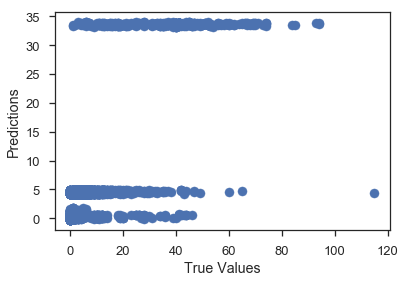

In [40]:
plt.scatter(Y_test, predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.show()

In [41]:
from sklearn.metrics import r2_score,mean_squared_error
print('Variance score: %.2f' % r2_score(Y_test, predictions))

Variance score: 0.64


In [42]:
print("Mean squared error: %.2f"
      % mean_squared_error(Y_test, predictions))

Mean squared error: 3.28


In [43]:
Y_test.describe() 

count    101624.000000
mean          0.706329
std           3.025731
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max         115.000000
Name: Resolution_Time, dtype: float64

In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X[c.index], Y, test_size=0.30, random_state=42)
from sklearn import linear_model
lm = linear_model.LinearRegression()
model = lm.fit(X_train,Y_train)
predictions=model.predict(X_test)
from sklearn.metrics import r2_score,mean_squared_error
print('Variance score: %.2f' % r2_score(Y_test, predictions))
print("Mean squared error: %.2f"
      % mean_squared_error(Y_test, predictions))

Variance score: 0.64
Mean squared error: 3.34


In [55]:
# 15 variables
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X[c.index], Y, test_size=0.30, random_state=42)
from sklearn import linear_model
lm = linear_model.LinearRegression()
model = lm.fit(X_train,Y_train)
predictions=model.predict(X_test)
from sklearn.metrics import r2_score,mean_squared_error
print('Variance score: %.2f' % r2_score(Y_test, predictions))
print("Mean squared error: %.2f"
      % mean_squared_error(Y_test, predictions))

Variance score: 0.64
Mean squared error: 3.34


In [58]:
# 5 variables
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X[c.index], Y, test_size=0.30, random_state=42)
from sklearn import linear_model
lm = linear_model.LinearRegression()
model = lm.fit(X_train,Y_train)
predictions=model.predict(X_test)
from sklearn.metrics import r2_score,mean_squared_error
print('Variance score: %.2f' % r2_score(Y_test, predictions))
print("Mean squared error: %.2f"
      % mean_squared_error(Y_test, predictions))

Variance score: 0.64
Mean squared error: 3.34


In [65]:
# all variables
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=42)
from sklearn import linear_model
lm = linear_model.LinearRegression()
model = lm.fit(X_train,Y_train)
predictions=model.predict(X_test)
from sklearn.metrics import r2_score,mean_squared_error
print('Variance score: %.2f' % r2_score(Y_test, predictions))
print("Mean squared error: %.2f"
      % mean_squared_error(Y_test, predictions))

Variance score: 0.64
Mean squared error: 3.28


In [63]:
from sklearn.model_selection import cross_val_score
clf=linear_model.LinearRegression()
scores = cross_val_score(clf, X[c.index], Y,scoring="neg_mean_squared_error", cv=10)
np.sqrt(-scores).mean()

1.7567286543510225

# Lasso Regression

In [158]:
from sklearn.linear_model import LassoLarsCV
model=LassoLarsCV(cv=10, precompute=False).fit(X,Y)

In [133]:
ab= (dict(zip(X_train.columns, model.coef_)))

In [134]:
ab=pd.DataFrame(ab,index=ab.keys())
#ab.head(2)


### Feature selection using Lasso

In [143]:
ab.columns[(ab == 0).all()] # these coefficients are zero and can be excluded

Index(['Club/Bar/Restaurant', 'Collection Truck Noise', 'DEP', 'EDC',
       'House of Worship', 'Noise', 'Noise - Commercial', 'Noise - Helicopter',
       'Noise - House of Worship', 'Noise - Park', 'Noise - Residential',
       'Noise - Street/Sidewalk', 'Noise - Vehicle', 'Park/Playground',
       'Residential Building/House', 'Sidewalk', 'Store/Commercial',
       'Street/Sidewalk'],
      dtype='object')

In [136]:
rsquared_train=model.score(X_train,Y_train)
rsquared_test=model.score(X_test,Y_test)
print ('training data R-square')
print(rsquared_train)
print ('test data R-square')
print(rsquared_test)

training data R-square
0.620529400774
test data R-square
0.641327745831


In [71]:
from sklearn.metrics import mean_squared_error
train_error = mean_squared_error(Y_train, model.predict(X_train))
test_error = mean_squared_error(Y_test, model.predict(X_test))
print ('training data MSE')
print(train_error)
print ('test data MSE')
print(test_error)

training data MSE
3.40437201682
test data MSE
3.28139167329


In [148]:
alphas = np.logspace(-4, -1, 10)
scores = []
pred=[]
for i,a in enumerate(alphas):
    lasso = linear_model.Lasso()
    lasso.set_params(alpha=a)
    lasso.fit(X_train, Y_train)
    pred.append(lasso.predict(X_test))
    scores.append(r2_score(Y_test,lasso.predict(X_test)))
    mse.append(mean_squared_error(Y_test,lasso.predict(X_test)))


In [126]:
sum(scores)/len(scores)

0.60274645352946832

In [149]:
sum(mse)/len(mse)

3.4589929421700183

## Implementing Lasso with CV

In [130]:
lassocv = linear_model.LassoCV(cv=10)
lassocv.fit(X, Y)
lassocv_score = lassocv.score(X, Y)
lassocv_alpha = lassocv.alpha_
print('R2', lassocv_score)

R2 0.626511611764


# Ridge Regression

In [153]:
from sklearn.linear_model import Ridge,RidgeCV
alphas = np.logspace(-4, -1, 10)
scores = []
pred=[]
mse=[]
for i,a in enumerate(alphas):
    lasso = linear_model.Ridge()
    lasso.set_params(alpha=a)
    lasso.fit(X_train, Y_train)
    pred.append(lasso.predict(X_test))
    scores.append(r2_score(Y_test,lasso.predict(X_test)))
    mse.append(mean_squared_error(Y_test,lasso.predict(X_test)))


In [154]:
print('R2 of Ridge is ',sum(scores)/len(scores))

R2 of Ridge is  0.641599165517


In [155]:
print('R2 of Ridge is ',sum(mse)/len(mse))

R2 of Ridge is  3.2811454236


# Implementing Ridge Cross Validation

In [156]:
ridgecv = linear_model.RidgeCV(cv=10)
ridgecv.fit(X, Y)
ridgecv_score = ridgecv.score(X, Y)
ridgecv_alpha = ridgecv.alpha_
print('R2', ridgecv_score)

R2 0.627171638105
